<a href="https://colab.research.google.com/github/morrea1/MANE-4962/blob/main/HW5Morreale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 5 Alex Morreale 662024409

## Question 1

In [ ]:
# PART A

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Define the CNN model
model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
        layers.Conv2D(64, kernel_size=(5, 5), activation="relu"),  # First convolutional layer
        layers.MaxPooling2D(pool_size=(2, 2)),  # First max pooling layer
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),  # Second convolutional layer
        layers.MaxPooling2D(pool_size=(2, 2)),  # Second max pooling layer
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),  # Third convolutional layer
        layers.Flatten(),  # Flatten layer
        layers.Dense(64, activation="relu"),  # Dense layer with ReLU activation
        layers.Dense(10, activation="softmax"),  # Output layer with softmax activation
    ]
)



In [ ]:
# compile

compile_model = model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7047 - loss: 0.8461 - val_accuracy: 0.6589 - val_loss: 0.9819
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7115 - loss: 0.8207 - val_accuracy: 0.6583 - val_loss: 0.9857
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7209 - loss: 0.7897 - val_accuracy: 0.6676 - val_loss: 0.9675
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7290 - loss: 0.7733 - val_accuracy: 0.6565 - val_loss: 0.9838
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7326 - loss: 0.7563 - val_accuracy: 0.6691 - val_loss: 0.9929
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7443 - loss: 0.7305 - val_accuracy: 0.6761 - val_loss: 0.9809
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7500 - loss: 0.7146 - val_accuracy: 0.6660 - val_loss: 1.0166
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7516 - loss: 0.7013 - val_accuracy: 0.

Train Accuracy: 0.7632799744606018
Validation Accuracy: 0.6687999963760376


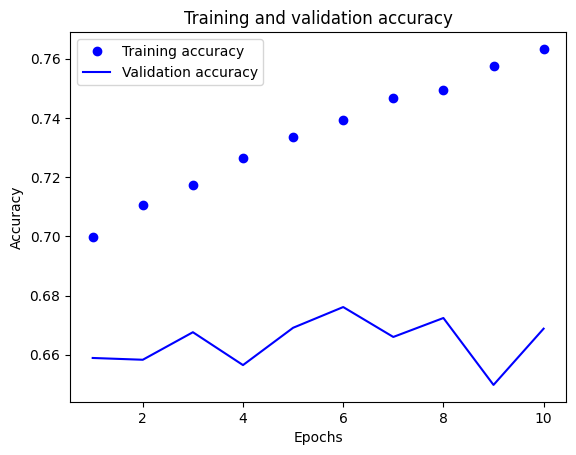

In [ ]:
# Part B

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("Train Accuracy:", train_acc[-1])
print("Validation Accuracy:", val_acc[-1])

import matplotlib.pyplot as plt

epochs = range(1, len(train_acc) + 1)  # Create a range for the x-axis (epochs)

plt.plot(epochs, train_acc, 'bo', label='Training accuracy')  # Plot training accuracy
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')  # Plot validation accuracy

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Question 2

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# load data
data = load_breast_cancer()
X = data.data[:, [27, 28, 29]]  # Select worst compactness, worst concavity, and worst area features
y = data.target

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)  # 80% training, 20% testing


In [2]:
# create and train
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)



SVC(kernel='linear')

In [4]:
# predict
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Part A
print("Accuracy:", accuracy)

Accuracy: 0.8859649122807017


In [5]:
# Part B
svm_model = SVC(kernel='rbf', C=2.0)  # Using RBF kernel and C=2
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with RBF kernel (C=2):", accuracy)


Accuracy with RBF kernel (C=2): 0.9736842105263158
